In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

In [4]:
df = pd.read_csv("Ecommerce Customers")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


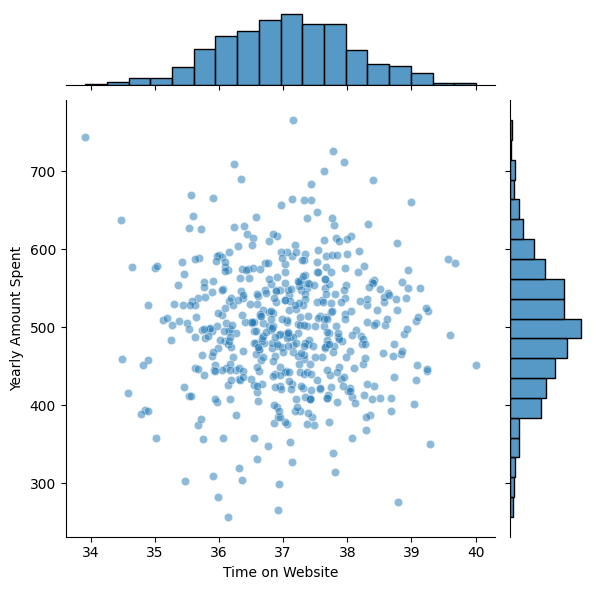

In [7]:
# EDA

sns.jointplot(x = "Time on Website", y = "Yearly Amount Spent", data = df, alpha = 0.5)

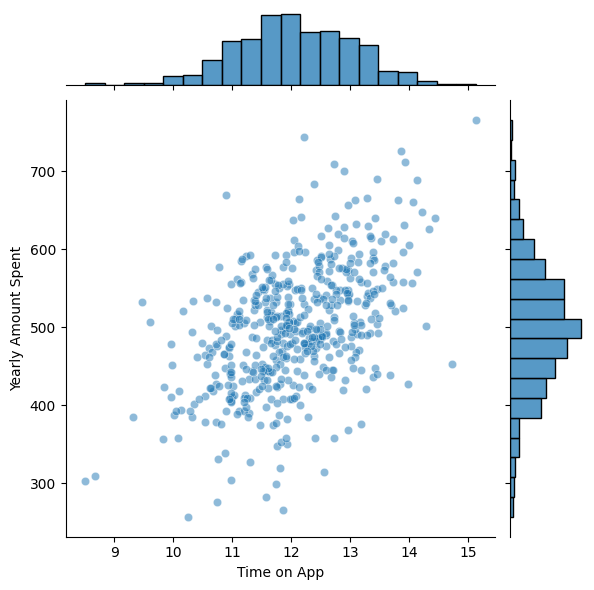

In [8]:

sns.jointplot(x = "Time on App", y = "Yearly Amount Spent", data = df, alpha = 0.5)

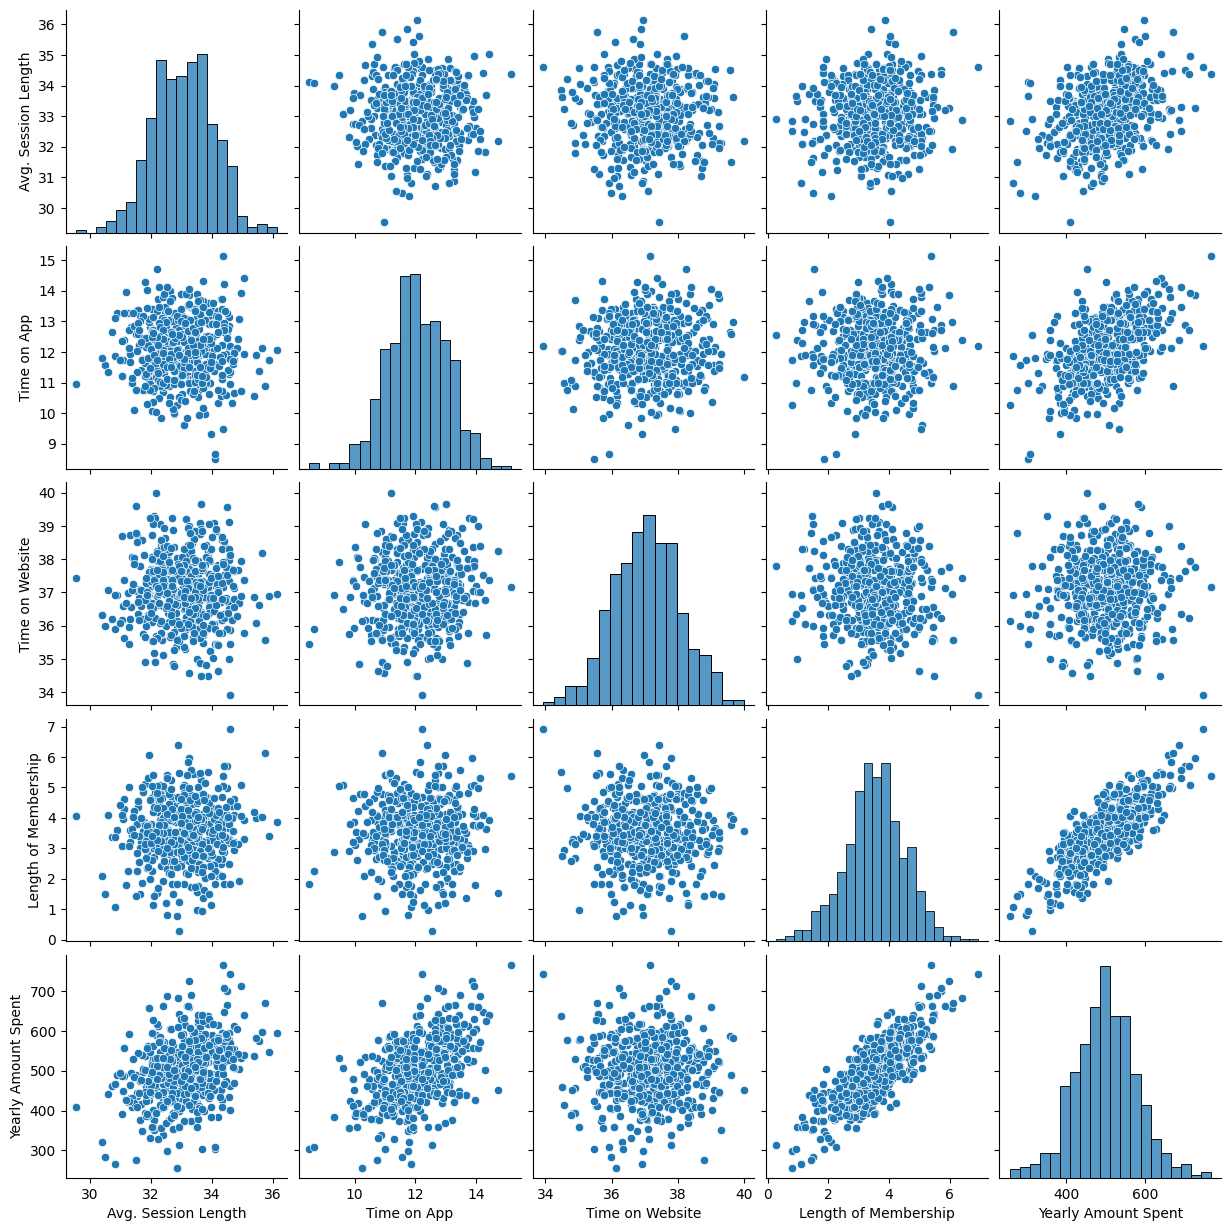

In [9]:
sns.pairplot(data=df, kind = 'scatter')

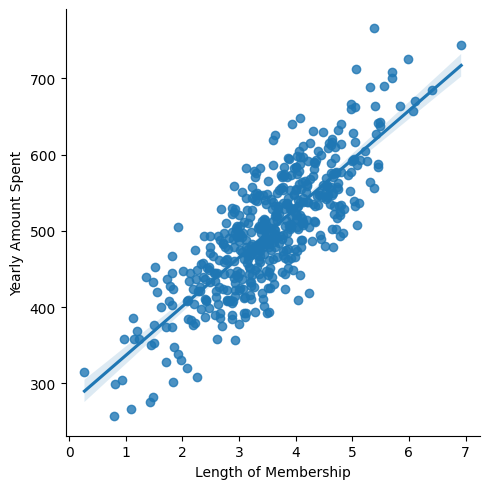

In [10]:
sns.lmplot(x = "Length of Membership", y = "Yearly Amount Spent", data = df)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df[['Time on App', 'Time on Website', 'Time on App','Length of Membership']]
X

,Time on App,Time on Website,Time on App,Length of Membership
0,12.655651,39.577668,12.655651,4.082621
1,11.109461,37.268959,11.109461,2.664034
2,11.330278,37.110597,11.330278,4.104543
3,13.717514,36.721283,13.717514,3.120179
4,12.795189,37.536653,12.795189,4.446308
...,...,...,...,...
495,13.566160,36.417985,13.566160,3.746573
496,11.695736,37.190268,11.695736,3.576526
497,11.499409,38.332576,11.499409,4.958264
498,12.391423,36.840086,12.391423,2.336485


In [13]:
y = df['Yearly Amount Spent']
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

In [15]:
#Training the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
model.coef_

array([19.30427173,  0.78562369, 19.30427173, 62.55928792])

In [18]:
cf = pd.DataFrame(model.coef_, X.columns, columns=['Coef'])
cf

,Coef
Time on App,19.304272
Time on Website,0.785624
Time on App,19.304272
Length of Membership,62.559288


In [19]:
model.intercept_

np.float64(-215.5827648084478)

In [20]:
#Predictions
pred = model.predict(X_test)
pred

array([429.47210171, 549.31218446, 469.45917026, 517.26864352,
       453.30743285, 586.77274082, 480.43964578, 507.87790281,
       424.42185231, 475.98961873, 470.09091211, 414.46445873,
       428.63754654, 487.01257302, 448.1500256 , 409.45375361,
       571.18066702, 479.50208277, 444.50723503, 483.66493466,
       460.11061419, 480.43797079, 527.63371392, 632.16176969,
       436.73240808, 503.55520124, 568.69314436, 528.72859582,
       429.36409196, 352.16513089, 513.97073363, 497.9897364 ,
       497.36719991, 317.14314417, 507.79503236, 472.15712634,
       543.92620023, 434.66394134, 469.50780249, 477.9911575 ,
       480.42766939, 426.87833886, 500.51404989, 514.65248448,
       497.32995695, 533.69902098, 559.53248572, 493.12170996,
       319.13483159, 471.82925757, 439.20574544, 495.41794949,
       602.50554948, 604.97133051, 602.81708635, 471.73760128,
       402.42393424, 477.47828545, 533.93141144, 512.76000721,
       502.91005133, 403.13108398, 488.30266824, 466.95

Text(0, 0.5, 'Evalualtion of Linear Model')

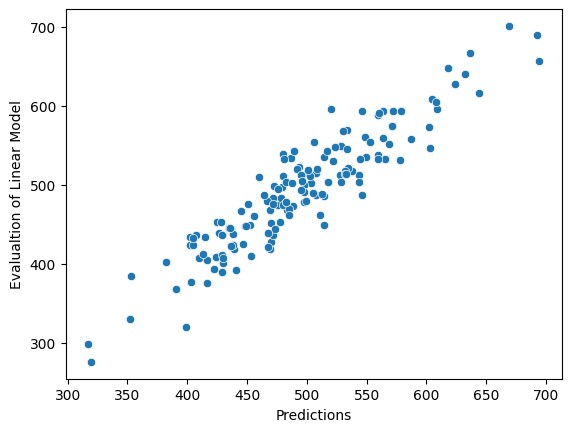

In [21]:
sns.scatterplot(x=pred, y=y_test)
plt.xlabel('Predictions')
plt.ylabel('Evalualtion of Linear Model')

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [23]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, pred))
print("Mean Absolute Error: ", mean_squared_error(y_test, pred))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, pred)))

Mean Absolute Error:  22.57620980116825
Mean Absolute Error:  758.6208936474463
RMSE:  27.543073424137805


In [24]:
#residuals
residuals = y_test-pred

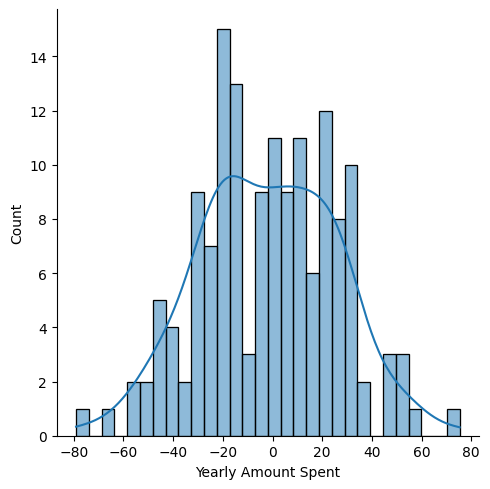

In [27]:
sns.displot(residuals, bins = 30, kde=True)

((array([-2.60376328, -2.283875  , -2.1005573 , -1.96875864, -1.86428437,
         -1.77691182, -1.70131573, -1.63435332, -1.57400778, -1.51890417,
         -1.46806125, -1.42075308, -1.37642684, -1.33465133, -1.29508341,
         -1.25744533, -1.22150891, -1.18708433, -1.15401181, -1.12215558,
         -1.0913992 , -1.06164202, -1.03279638, -1.00478546, -0.97754152,
         -0.95100448, -0.92512081, -0.89984257, -0.87512664, -0.85093408,
         -0.8272296 , -0.80398107, -0.78115919, -0.75873709, -0.73669013,
         -0.71499557, -0.69363244, -0.67258128, -0.65182406, -0.63134396,
         -0.61112532, -0.59115349, -0.57141472, -0.55189613, -0.53258558,
         -0.51347162, -0.49454346, -0.47579085, -0.45720409, -0.43877397,
         -0.4204917 , -0.40234892, -0.38433762, -0.36645016, -0.3486792 ,
         -0.33101768, -0.31345882, -0.29599609, -0.27862316, -0.26133393,
         -0.24412247, -0.22698303, -0.20991002, -0.19289797, -0.17594158,
         -0.15903562, -0.142175  , -0.

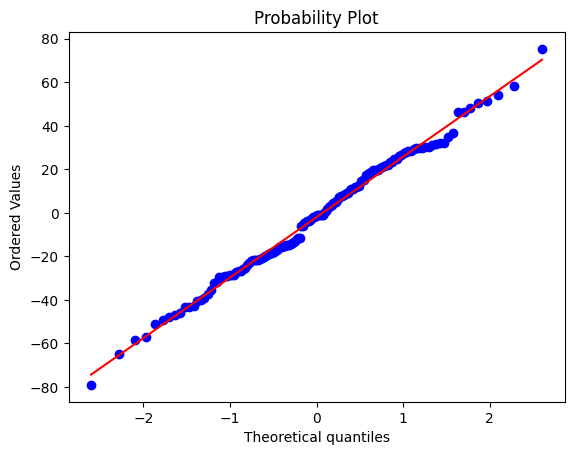

In [ ]:
#Test for normality
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist='norm', plot=pylab)